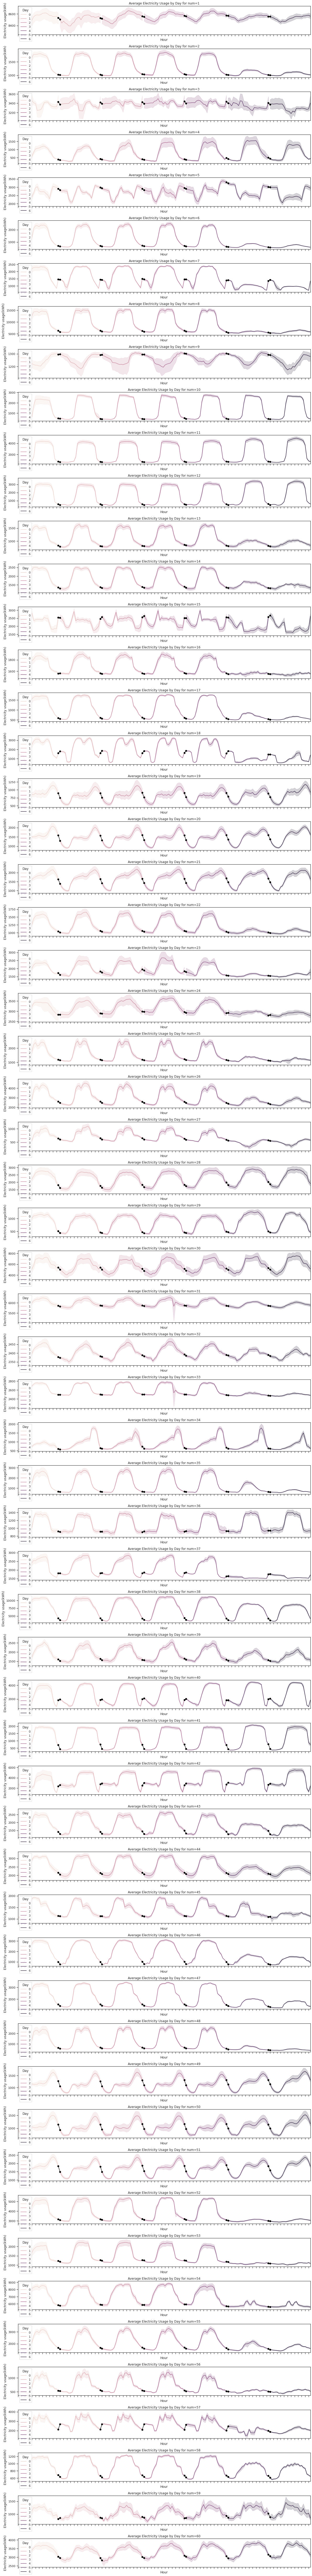

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# 데이터 불러오기
df = pd.read_csv('~/aiffel/datathon/train.csv', encoding='cp949')

# 칼럼정보: 'num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)','강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유'

fig, axs = plt.subplots(nrows=60, ncols=1, figsize=(20, 180))  # 60행 1열의 그래프를 그릴 준비

for i in range(1, 61):
    # 'num' 컬럼이 i이고 월요일부터 일요일까지 데이터 필터링
    df_week = df[(df['num'] == i) & (pd.to_datetime(df['date_time']).dt.dayofweek >= 0) & (pd.to_datetime(df['date_time']).dt.dayofweek <= 6)]

    # 요일별 평균 전력사용량 그래프 시각화
    sns.lineplot(ax=axs[i-1], x=pd.to_datetime(df_week['date_time']).dt.hour+(pd.to_datetime(df_week['date_time']).dt.dayofweek*24), y='전력사용량(kWh)', data=df_week, estimator=np.mean, hue=pd.to_datetime(df_week['date_time']).dt.dayofweek)
    axs[i-1].set_xlabel('Hour')
    axs[i-1].set_ylabel('Electricity usage(kWh)')
    axs[i-1].set_title(f'Average Electricity Usage by Day for num={i}')
    axs[i-1].set_xticks(np.arange(0, 168, 2))
    axs[i-1].set_xlim(0, 167)
    axs[i-1].set_xticklabels([])
    axs[i-1].legend(title='Day', loc='upper left')

    # 요일별 그래프의 시작점과 끝점을 연결하여 하나의 그래프로 만들기
    for j in range(6):
        axs[i-1].plot([j*24+23, (j+1)*24], [df_week[(pd.to_datetime(df_week['date_time']).dt.dayofweek == j)].groupby(pd.to_datetime(df_week[(pd.to_datetime(df_week['date_time']).dt.dayofweek == j)]['date_time']).dt.hour)['전력사용량(kWh)'].mean().iloc[-1], df_week[(pd.to_datetime(df_week['date_time']).dt.dayofweek == (j+1))].groupby(pd.to_datetime(df_week[(pd.to_datetime(df_week['date_time']).dt.dayofweek == (j+1))]['date_time']).dt.hour)['전력사용량(kWh)'].mean().iloc[0]], 'o-', color='black')

plt.subplots_adjust(hspace=0.5)
plt.show()